# FIFA 23 Ratings Predictor
#### A Project on Predicting Football Players' Ratings Using Machine Learning Techniques

#### Introduction
Football, the most popular sport in the world, has been revolutionised in recent times with new trends in data science, machine learning and artificial intelligence. Over the years, the coverage and impact of analytics on the beautiful game has vastly increased, with play-by-play data recorded and studied for every player who touches a ball anywhere on the planet. 

![title](https://miro.medium.com/max/860/0*gU-elbAC4jxISqKM)

Considering the reliable impact that data analysis can have on the outcome of football matches, data science has risen to the forefront of the football industry with numerous possible applications including:
1. Match planning and in-game tactical decisions
2. Identifying play styles
3. Player valuation and transfer market analysis
4. Training regimens and focus
5. Injury prediction and prevention using test results and workloads


A particularly important element of data science in football is the ability to evaluate and analyse a player's in-game performance to draw inferences regarding his future impact and ability. 

The hugely popular football simulation game "FIFA", first released by EA Sports in 1993 and featuring thousands of professional players from all over the globe with hyper-realistic gameplay, makes use of similar analysis techniques to generate in-game stats for real-world football players based on their actual in-game performances.

### Objective and Motivation
The main aim of this project is to use various data science and machine learning techniques to build a reliable and accurate predictor for attacking, passing and defensive ratings for football players in the "FIFA 23" simulation game using statistics from the 2021/22 season of professional football leagues in Europe.
Different machine learning models will be tested and different model designs and hypotheses will be explored in order to maximise the predictive capability and performance of this project.

![title](https://totalfootballanalysis.com/wp-content/uploads/2020/09/Ars-att-1-1200x540.png)

### Project Workflow

In order to make use of a specific collection of statistics to generate the most accurate predictions, processed data will be passed through different regression models for training and evaluation of results.
![image.jpg](https://www.researchgate.net/profile/Alexander-Osman/publication/330542014/figure/fig3/AS:736331865026562@1552566605605/A-generic-machine-learning-workflow.png)

Data from the players of the following European football clubs will be used as a part of the project:
1. Manchester United FC(England)
2. Manchester City FC (England)
3. Liverpool FC (England)
4. Chelsea FC (England)
5. Tottenham Hotspur (England)
6. Arsenal FC (England)
7. Real Madrid (Spain)
8. Barcelona (Spain)
9. Atletico Madrid (Spain)
10. Bayern Munich (Germany)
11. Borussia Dortmund (Germany)
12. Juventus (Italy)
13. Inter Milan (Italy)
14. AC Milan (Italy)
15. Paris Saint-Germain (France)

### Part One: Defense

This part deals with the prediction of the "Defending" statistic for the base editions of statistics in FIFA 23. Every player's contribution in the defensive side of the game will be analysed over 3 past seasons to determine which factors have the maximum impact on the overall rating for their defending and subsequently train a regression model for predicting the same.

The model will then be optimised and used to predict the "Defending" stat in the "FIFA 23" game using records from the 2021/22 season gone by. 

In [95]:
#Installing all required Python libraries
!pip install pandas numpy matplotlib seaborn scikit-learn --quiet

#Importing the processed dataset and filtering out defenders
import pandas as pd
def_df = pd.read_csv('def_test.csv')
def_df = def_df[def_df['Pos']=='DF']
def_df.head(5)

,Player,Season,Nation,Pos,Age,90s,Tkl,TklW,Def 3rd Tkls,Mid 3rd Tkls,...,BlocksSh,ShSv,BlocksPass,Int,Tkl+Int,Clr,Err,FIFADefPast,TablePos,FIFADefCurr
0,Virgil van Dijk,2019/20,nl NED,DF,28.0,38.0,30.0,20.0,20.0,9.0,...,16.0,1.0,16.0,24.0,54.0,259.0,2.0,90.0,1.0,91.0
1,Trent Alexander-Arnold,2019/20,eng ENG,DF,20.0,35.3,58.0,25.0,38.0,14.0,...,9.0,0.0,44.0,34.0,92.0,98.0,2.0,78.0,1.0,80.0
3,Andrew Robertson,2019/20,sct SCO,DF,25.0,34.6,60.0,32.0,19.0,25.0,...,7.0,0.0,52.0,30.0,90.0,82.0,0.0,80.0,1.0,81.0
10,Joe Gomez,2019/20,eng ENG,DF,22.0,22.3,26.0,15.0,17.0,9.0,...,8.0,0.0,17.0,19.0,45.0,90.0,1.0,79.0,1.0,83.0
15,Dejan Lovren,2019/20,hr CRO,DF,30.0,8.6,16.0,9.0,12.0,4.0,...,6.0,0.0,7.0,8.0,24.0,81.0,1.0,80.0,1.0,78.0


![title](https://www.si.com/.image/t_share/MTg5NDgyMTg1MTMxMDQyNDAx/virgil-van-dijk-10.jpg)

The dataframe displays defensive stats for each player, sorted by name, nationality, season, number ofminutes played and position.

The various stats which are predicted to have a significant rating on the overall defending attribute of a player are as follows:
1. Number of players tackled and tackles won
2. Number of tackles in the defensive, middle and attacking third of the pitch
3. Number of dribblers successfully tackled, attempted to tackle and success rate
4. Number of pressures applied, successful pressures and success rate
5. Number of blocks and shots on target saved
6. Number of interceptions and clearances

In [96]:
#Splitting the dataset into training and test data by season
test_df = def_df[def_df.Season == '2021/22']
train_df = def_df[(def_df.Season=='2019/20') | (def_df.Season == '2020/21')]

The input and target columns need to provided to train the model. The inputs will be the defending statistics from the 2021/22 footballing season, while the target column will be the current "Defending" rating of the player in the game.

In [4]:
#Identifying input and target columns
inputs=train_df[train_df.columns[6:-1]]
targets=train_df[train_df.columns[-1]]

The data is ready to be passed through different regression models, and the accuracy of each model on the validation dataset can be analysed.

### Model 1: Simple Linear Regression

In [27]:
#Training models and calculating accuracy 
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(inputs,targets)
preds = model.predict(inputs)

from sklearn.metrics import mean_squared_error,accuracy_score
rmse1 = mean_squared_error(targets,preds,squared=False)
accuracy1=model.score(inputs,targets)*100

print("The accuracy is: ",accuracy1,"\nThe RMSE error is: ",rmse1)

The accuracy is:  91.2401429757837 
The RMSE error is:  2.004694530286966


### Model 2: Decision Tree Classifier

In [44]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(n_estimators=50,n_jobs=-1,random_state=42)
model2.fit(inputs,targets)
preds2 = model2.predict(inputs)

rmse2 = mean_squared_error(targets,preds2,squared=False)
accuracy2=model2.score(inputs,targets)*100

print("The accuracy is: ",accuracy2,"\nThe RMSE error is: ",rmse2)

The accuracy is:  96.12655486520426 
The RMSE error is:  1.333056021390093


### Model 3: Bayesian Ridge Regressor

In [45]:
from sklearn.linear_model import BayesianRidge
model3=BayesianRidge()
model3.fit(inputs,targets)
preds3 = model3.predict(inputs)

rmse3 = mean_squared_error(targets,preds3,squared=False)
accuracy3=model3.score(inputs,targets)*100

print("The accuracy is: ",accuracy3,"\nThe RMSE error is: ",rmse3)

The accuracy is:  91.18326818272608 
The RMSE error is:  2.011191903292401


The accuracy and RMSE errors for each of the models can thus be tabulated. 
It is observed that the Decision Tree Regressor provides maximum accuracy for the required data and will thus be used to generate test results.

In [46]:
accuracy_df = pd.DataFrame({'Model':['Linear Regressor','Decision Tree Regressor','Bayesian Regressor'],
                            'Accuracy':[accuracy1, accuracy2,accuracy3],
                            'RMSE Error':[rmse1,rmse2,rmse3]})
accuracy_df.sort_values(by='Accuracy',ascending=False)

,Model,Accuracy,RMSE Error
1,Decision Tree Regressor,96.126555,1.333056
0,Linear Regressor,91.240143,2.004695
2,Bayesian Regressor,91.183268,2.011192


### Predicting final results
The hyperparameters are thus tuned to fit the training data. The test results are generated and saved as a separately accessible Excel sheet.

In [77]:
final_model = RandomForestRegressor(n_estimators=64,n_jobs=-1,max_depth=15,min_weight_fraction_leaf=0,max_leaf_nodes=2**6,random_state=42)
final_model.fit(inputs,targets)
preds2 = final_model.predict(inputs)

final_rmse = mean_squared_error(targets,preds2,squared=False)
final_accuracy=final_model.score(inputs,targets)*100

print("The accuracy is: ",final_accuracy,"\nThe RMSE error is: ",final_rmse)

The accuracy is:  96.7064499634158 
The RMSE error is:  1.229226259644416


In [109]:
#Predicting test results
test_inputs=test_df[test_df.columns[6:-1]]
test_targets=test_df[test_df.columns[-1]]
test_preds = final_model.predict(test_inputs)
import pandas as pd
pd.options.mode.chained_assignment = None  
test_df.loc[:,("FIFADefCurr")] = test_preds

#Exporting to excel
!pip install openpyxl
import openpyxl as px
test_df.to_excel('def_data.xlsx')

### Tabulating the model features

In [104]:
tree_importance_df = pd.DataFrame({
    'Feature': inputs.columns,
    'Importance': final_model.feature_importances_
}).sort_values(by=['Importance'],ascending=False)

tree_importance_df

,Feature,Importance
23,FIFADefPast,0.688128
10,PressuresSucc,0.072748
11,Pressures%,0.053728
9,Press,0.043013
20,Tkl+Int,0.020280
0,Tkl,0.019786
21,Clr,0.018933
13,Pressures Mid 3rd,0.011051
7,Tkl% vs Dribble,0.009007
3,Mid 3rd Tkls,0.008032


#### As seen from the feature importances, the ratings in the next generation, i.e. FIFA 23 here, have a significant dependence on the previous ratings, in this case, the ratings from FIFA 22.

Plotting the top 10 important features, it can be seen that pressuring opponents and how successful the defender is in applying the pressure plays a significant factor in assessing how well he can defend. As is obvious, the number of tackles and clearances made also remain most important, while a high tackle success rate against dribblers also contributes to an improvement in the defending statistic.

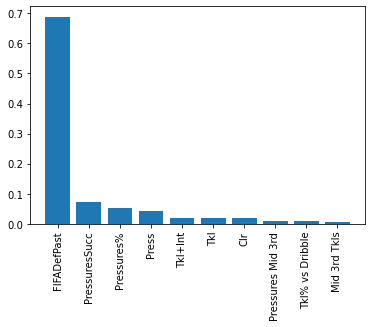

In [106]:
top_10 = tree_importance_df.sort_values(by=['Importance'],ascending=False).head(10)
import matplotlib.pyplot as plt
plt.bar(top_10.Feature, top_10.Importance)
plt.xticks(rotation=90);

### Part Two: Midfield

![Mid_Image](https://e0.365dm.com/20/08/768x432/skysports-kevin-de-bruyne-manchester-city_5068719.jpg?20200815213516)

Midfielders occupy a key area on the pitch, providing the vital link between attack and defense. As such, excellent passing ability and a keen eye for a through pass is what makes midfielders stand out.

This part thus deals with the prediction of the "Passing" statistic for the base editions of midfielders in FIFA 23. The contribution of every midfielder in terms of short, medium and long passes attempted and completed will be analysed over 3 past seasons to determine which factors have the maximum impact on the overall rating for their passing and subsequently train a regression model for predicting the same.

The model will then be optimised in a similar way as for defenders and used to predict the "Passing" stat in the "FIFA 23" game using records from the 2021/22 season gone by.

In [30]:
#Importing the dataset
import pandas as pd
mid_df = pd.read_csv('mid_stats.csv')
mid_df.head(5)

,Player,Season,Nation,Pos,Age,90s,TotalCmp,TotalAtt,TotalCmp%,TotDist,...,xA,A-xA,AstShots,1/3rd,PPA,CrossPA,Prog,FIFAPasPast,TablePos,FIFAPasCurr
0,Fred,2019/20,br BRA,MF,26,39.7,2052,2377,86.3,41329,...,3.3,0.7,45,213,19,3,186,73,3,79.0
1,Nemanja Matic,2019/20,rs SRB,MF,30,28.4,1426,1607,88.7,26641,...,1.3,0.7,20,159,18,1,137,77,3,76.0
2,Scott McTominay,2019/20,sct SCO,MF,22,27.3,1063,1284,82.8,21604,...,1.2,-0.2,18,118,15,3,114,65,3,75.0
3,Juan Mata,2019/20,es ESP,MFFW,31,22.0,871,1044,83.4,14664,...,5.5,1.5,41,99,30,2,87,83,3,82.0
4,Jesse Lingard,2019/20,eng ENG,MFFW,26,21.1,567,662,85.6,8724,...,1.9,-0.9,24,57,17,0,50,76,3,74.0


The compiled dataframe for midfielders displays passing stats for each player, sorted by name, nationality, season, number of minutes played and position.

The various stats which are predicted to have a significant rating on the overall passing attribute of a midfield player are as follows:

1. Number of total passes attempted, completed and completion rate
2. Total distance covered by passes made and progressive distance
3. Short range passes attempted, completed and completion rate
4. Medium range passes attempted, completed and completion rate
5. Long range passes attempted, completed and completion rate
6. Number of assists, expected assists and their difference
7. Number of completed passes that directly lead to a shot
8. Number of progressive passes into the 18 yard box, crosses completed and total progressive passes

In [17]:
#Splitting dataset into training and test data
train_df = mid_df[(mid_df.Season == '2020/21') | (mid_df.Season == '2019/20')]
inputs = train_df[train_df.columns[6:-1]]
targets = train_df[train_df.columns[-1]]
test_mid_df = mid_df[mid_df.Season=='2021/22']

Different machine learning models can then be used to apply linear regression techniques on the training data and generate test results.

### Model 1: Simple Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(inputs,targets)
preds = model.predict(inputs)

from sklearn.metrics import mean_squared_error
rmse_mid1 = mean_squared_error(targets,preds,squared=False)
accuracy_mid1=model.score(inputs,targets)*100

print("The accuracy is: ",accuracy_mid1,"\nThe RMS error is: ",rmse_mid1)

The accuracy is:  93.3914998579607 
The RMSE error is:  1.7168953079718279


### Model 2: Decision Tree Regressor

In [46]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(n_estimators=50,n_jobs=-1,random_state=42)
model2.fit(inputs,targets)
preds2 = model2.predict(inputs)

rmse_mid2 = mean_squared_error(targets,preds2,squared=False)
accuracy_mid2=model2.score(inputs,targets)*100

print("The accuracy is: ",accuracy_mid2,"\nThe RMS error is: ",rmse_mid2)

The accuracy is:  98.58637043461823 
The RMS error is:  0.7940725288677107


### Model 3: Bayesian Ridge Regressor 

In [9]:
from sklearn.linear_model import BayesianRidge
model3=BayesianRidge()
model3.fit(inputs,targets)
preds3 = model3.predict(inputs)

rmse_mid3 = mean_squared_error(targets,preds3,squared=False)
accuracy_mid3=model3.score(inputs,targets)*100

print("The accuracy is: ",accuracy_mid3,"\nThe RMS error is: ",rmse_mid3)

The accuracy is:  93.26921362426584 
The RMS error is:  1.7327075406134476


The accuracy and RMSE errors for each of the models can thus be tabulated. 
It is observed that the Decision Tree Regressor provides maximum accuracy for the required data and will thus be used to generate test results.

In [10]:
accuracy_df = pd.DataFrame({'Model':['Linear Regressor','Decision Tree Regressor','Bayesian Regressor'],
                            'Accuracy':[accuracy_mid1, accuracy_mid2,accuracy_mid3],
                            'RMS Error':[rmse_mid1,rmse_mid2,rmse_mid3]})
accuracy_df.sort_values(by='Accuracy',ascending=False)

,Model,Accuracy,RMS Error
1,Decision Tree Regressor,98.586370,0.794073
0,Linear Regressor,93.391500,1.716895
2,Bayesian Regressor,93.269214,1.732708


### Predicting Final Results
The hyperparameters of the decision tree are thus tuned to fit the training data. The test results for midfielders are also generated and saved as a separately accessible Excel sheet.

In [47]:
from sklearn.ensemble import RandomForestRegressor
final_model_mid = RandomForestRegressor(n_estimators=60,n_jobs=-1,max_depth=13,min_weight_fraction_leaf=0.0001,max_leaf_nodes=2**6,random_state=42)
final_model_mid.fit(inputs,targets)
final_preds = final_model_mid.predict(inputs)

final_rmse_mid = mean_squared_error(targets,final_preds,squared=False)
final_accuracy_mid=final_model_mid.score(inputs,targets)*100

print("The accuracy is: ",final_accuracy_mid,"\nThe RMS error is: ",final_rmse_mid)

The accuracy is:  98.69565546251971 
The RMS error is:  0.7627610778889133


In [28]:
#Predicting test results
test_inputs=test_mid_df[test_mid_df.columns[6:-1]]
test_targets=test_mid_df[test_mid_df.columns[-1]]
test_mid_preds = final_model_mid.predict(test_inputs)
import pandas as pd
pd.options.mode.chained_assignment = None  
test_mid_df.loc[:,("FIFAPasCurr")] = test_mid_preds

#Exporting to excel
!pip install openpyxl
import openpyxl as px
test_mid_df.to_excel('mid_results.xlsx')

### Tabulating Model Features

In [31]:
tree_importance_mid_df = pd.DataFrame({
    'Feature': inputs.columns,
    'Importance': final_model_mid.feature_importances_
}).sort_values(by=['Importance'],ascending=False)

tree_importance_mid_df

,Feature,Importance
22,FIFAPasPast,0.883095
15,xA,0.019861
17,AstShots,0.015901
19,PPA,0.006873
12,LongAtt,0.006741
16,A-xA,0.006661
11,LongCmp,0.006324
7,ShortCmp%,0.005522
2,TotalCmp%,0.005455
6,ShortAtt,0.004266


#### As seen from the feature importances again, the ratings for midfielders too in the next generation, i.e. FIFA 23 here, have a significant dependence on the previous ratings, in this case, the ratings from FIFA 22.

It can be seen that expected assists(which show how well the player has been able to perform leading to assists), long passing statistics and how successful the midfielder is in providing passes that lead to a shot play a significant factor in assessing how well he ranks in his performance. 

As is obvious, the number of short passes and medium-range passes attempted and completed also remain most important and contribute to an improvement in the passing statistic.

### Part 3: Attack

![Att_Image](https://assets.goal.com/v3/assets/bltcc7a7ffd2fbf71f5/blt41cf1c6ec6291f63/625b04f3998b0c4a9d8cccff/Cristiano_Ronaldo_Manchester_United_Norwich_Premier_League_2021-22.jpg?auto=webp&fit=crop&format=jpg&height=800&quality=60&width=1200)

Football is a simple game, outscore your opponent and you win. This makes attackers the most significant and often the most valuable members of any football side.

This part thus deals with the prediction of the "Shooting" statistic for the base editions of attackers in FIFA 23, which shows the overall shooting accuarcy in front of goal. The contribution of all attackers in terms of goals, shots attempted and on target and many other factors will be analysed over 3 past seasons to determine which factors have the maximum impact on the overall rating for their shooting and subsequently train a regression model for predicting the same.

The model will again be optimised in a similar way and used to predict the "Shooting" stat in the "FIFA 23" game using records from the 2021/22 season gone by.

In [34]:
#Importing the dataset
import pandas as pd
att_df = pd.read_csv('att_stats.csv')
att_df.head(5)

,Player,Season,Nation,Pos,Age,90s,Goals,Shots,SoT,SoT%,...,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,FIFAShoPast,TablePos,FIFAShoCurr
0,Cristiano Ronaldo,2021/22,pt POR,FW,36,35.4,24,140,55,39.3,...,3,4,19.8,17.5,0.14,4.2,3.5,93,6,NaN
1,Jadon Sancho,2021/22,eng ENG,FWMF,21,27.6,5,38,13,34.2,...,0,0,4.1,4.1,0.13,-0.1,-0.1,76,6,NaN
2,Mason Greenwood,2021/22,eng ENG,FWMF,19,18.8,6,58,26,44.8,...,0,0,4.5,4.5,0.09,1.5,1.5,78,6,NaN
3,Marcus Rashford,2021/22,eng ENG,FWMF,23,18.4,5,42,16,38.1,...,0,0,3.2,3.2,0.10,1.8,1.8,84,6,NaN
4,Anthony Elanga,2021/22,se SWE,FW,19,16.1,3,27,11,40.7,...,0,0,4.0,4.0,0.16,-1.0,-1.0,60,6,NaN


The compiled dataframe for attackers all over Europe and abroad displays attacking stats for each player, sorted by name, nationality, season, number of minutes played and position.

The various stats which are predicted to have a significant rating on the overall shooting attribute of an attacking player are as follows:

1. Number of shots take, shots on target and goals scored
2. Percentage of shots on target, goals per shot and shot on target
3. Average distance in yards from goal when goal is scored
4. Shots and goals from free-kicks
5. Shots and goals from penalty kicks
6. Expected goals(xG), expected non-penalty goals 
7. Difference between expected and actual goals and non-penalty goals

In [35]:
#Splitting the dataset into training and test dataset by season
train_att_df = att_df[(att_df.Season == '2020/21') | (att_df.Season == '2019/20')]
inputs_att = train_att_df[train_att_df.columns[6:-1]]
targets_att = train_att_df[train_att_df.columns[-1]]
test_att_df = att_df[att_df.Season=='2021/22']

Different machine learning models can now be used to apply linear regression techniques on the training data and generate test results.

### Model 1: Simple Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(inputs_att,targets_att)
preds_att = model.predict(inputs_att)

rmse_att1 = mean_squared_error(targets_att,preds_att,squared=False)
accuracy_att1=model.score(inputs_att,targets_att)*100

print("The accuracy is: ",accuracy_att1,"\nThe RMS error is: ",rmse_att1)

The accuracy is:  95.1548937183085 
The RMS error is:  1.675720508857583


### Model 2: Decision Tree Regressor

In [38]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(n_estimators=50,n_jobs=-1)
model2.fit(inputs_att,targets_att)
preds_att2 = model2.predict(inputs_att)

rmse_att2 = mean_squared_error(targets_att,preds_att2,squared=False)
accuracy_att2=model2.score(inputs_att,targets_att)*100

print("The accuracy is: ",accuracy_att2,"\nThe RMS error is: ",rmse_att2)

The accuracy is:  98.79775224316617 
The RMS error is:  0.8347317228788714


### Model 3: Bayesian Ridge Regressor

In [39]:
from sklearn.linear_model import BayesianRidge
model3=BayesianRidge()
model3.fit(inputs_att,targets_att)
preds_att3 = model3.predict(inputs_att)

rmse_att3 = mean_squared_error(targets_att,preds_att3,squared=False)
accuracy_att3=model3.score(inputs_att,targets_att)*100

print("The accuracy is: ",accuracy_att3,"\nThe RMS error is: ",rmse_att3)

The accuracy is:  95.00639323088289 
The RMS error is:  1.7012067643992332


The accuracy and RMSE errors for each of the models can thus be tabulated. 
It is observed that the Decision Tree Regressor provides maximum accuracy for the required data and will thus be used to generate test results.

In [42]:
accuracy_att_df = pd.DataFrame({'Model':['Linear Regressor','Decision Tree Regressor','Bayesian Regressor'],
                            'Accuracy':[accuracy_att1, accuracy_att2,accuracy_att3],
                            'RMS Error':[rmse_att1,rmse_att2,rmse_att3]})
accuracy_att_df.sort_values(by='Accuracy',ascending=False)

,Model,Accuracy,RMS Error
1,Decision Tree Regressor,98.797752,0.834732
0,Linear Regressor,95.154894,1.675721
2,Bayesian Regressor,95.006393,1.701207


### Predicting Final Results
The hyperparameters of the decision tree are thus tuned to fit the training data. The test results for attackers are also generated and saved as a separately accessible Excel sheet.

In [48]:
#Tuning hyperparameters
from sklearn.ensemble import RandomForestRegressor
final_model_att = RandomForestRegressor(n_estimators=60,n_jobs=-1,max_depth=13,min_weight_fraction_leaf=0.0001,max_leaf_nodes=2**6,random_state=42)
final_model_att.fit(inputs_att,targets_att)
final_preds_att = final_model_att.predict(inputs_att)

final_rmse_att = mean_squared_error(targets_att,final_preds_att,squared=False)
final_accuracy_att=final_model_att.score(inputs_att,targets_att)*100

print("The accuracy is: ",final_accuracy_att,"\nThe RMS error is: ",final_rmse_att)

The accuracy is:  98.84511732989162 
The RMS error is:  0.8181234915089739


In [49]:
#Predicting test results
test_inputs_att=test_att_df[test_att_df.columns[6:-1]]
test_targets_att=test_att_df[test_att_df.columns[-1]]
test_att_preds = final_model_att.predict(test_inputs_att)
import pandas as pd
pd.options.mode.chained_assignment = None  
test_att_df.loc[:,("FIFAShoCurr")] = test_att_preds

#Exporting to excel
!pip install openpyxl
import openpyxl as px
test_att_df.to_excel('att_results.xlsx')

### Tabulating model features

In [50]:
tree_importance_att_df = pd.DataFrame({
    'Feature': inputs_att.columns,
    'Importance': final_model_att.feature_importances_
}).sort_values(by=['Importance'],ascending=False)

tree_importance_att_df

,Feature,Importance
17,FIFAShoPast,0.890927
0,Goals,0.019778
12,xG,0.019217
13,npxG,0.010337
5,SoT/90,0.007669
4,Sh/90,0.007123
18,TablePos,0.005959
3,SoT%,0.004670
8,Dist,0.004472
16,np:G-xG,0.004168


#### It can be seen that the ratings for attackers too in the next generation, i.e. FIFA 23 here, have a significant dependence on the previous ratings, in this case, the ratings from FIFA 22.

The feature importnaces show that the goals scored is the second-most important statistic as expected, while expected goals (xG) calculated according to every players' performance every match also contributes significantly. Also, shots attempted and shots on target per 90 minutes show how impactful the attacker's contribution has been and thus play an important factor in assessing how well he ranks in his performance. 

Surprisingly yet also expectedly, the distance from goal also plays a significant role in shooting, as shots on target from longer distance definitely show an increased shooting accuracy.

### Conclusion 

![Conclusion](https://www.enisa.europa.eu/news/enisa-news/conclusion-for-the-european-public-private-partnership-ppp-for-resilience-scheme/@@images/9e931ee7-c1ea-4009-8903-d7fb9c991483.jpeg)

Thus, through this project, the main objective of building a "FIFA Ratings Predictor" model by exploring different Machine Learning techniques has been accomplished. 

Different algorithms such as Neural Networks, Random Forest and Bayesian Ridge were used to implement the required models.

The predictions have also been compared to benchmark methods in order to better understand every model's predictive performance. 

It has been crucially found out how in-game statistics can be used to predict a professional football player's rating on a simulation game and which factors contribute most towards the same.

### Future Scope

##### 1. Improved data
The dataset has been manually compiled using online resources. An automatic data scraping and real-time compilation tool can help increase the overall efficiency of the project.

###### 2. Player-centred models
As a future expansion, a particular player's impact in real life can be studied in depth to assess future career progression and path.

##### 3. Team profiles
The ratings generated can be used to compare how much of a role they play in the prediction of a particular team's results.

![EndImage](https://www.spieltimes.com/wp-content/uploads/2022/06/FIFA-23.jpg)

### References

The dataset has been manually compiled from the following online resources:
1. FBRef Football Statistics (https://fbref.com/en/)
2. FUTBin- FIFA Ratings Website (https://www.futbin.com/)
3. Official clubs and player websites

The technical aspect of machine learning has been inspired by the "Machine Learning with Python: Zero to GBMs" online course provided by Jovian.ai. 

In [1]:
!pip install jovian --upgrade --quiet
import jovian
jovian.commit(project="fifa-23-ratings-predictor")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sahilrkale05/fifa-23-ratings-predictor" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/sahilrkale05/fifa-23-ratings-predictor


'https://jovian.ai/sahilrkale05/fifa-23-ratings-predictor'